In [11]:
#1
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
Sig_Eqs=pd.read_csv('earthquakes-2023-11-01_21-49-50_+0800.tsv',sep='\t')
Sig_Eqs=Sig_Eqs[Sig_Eqs['Year']>= -2150]
#1.1
death_sum=Sig_Eqs.groupby("Country")["Total Deaths"].sum()
death_seq=death_sum.sort_values(ascending=False)
top_ten=death_seq.head(10)
print(top_ten)

Country
CHINA         2041929.0
TURKEY         995648.0
IRAN           758650.0
SYRIA          437700.0
ITALY          422679.0
JAPAN          356083.0
HAITI          323776.0
AZERBAIJAN     310119.0
INDONESIA      282819.0
ARMENIA        189000.0
Name: Total Deaths, dtype: float64


Text(0, 0.5, 'Number of Earthquakes')

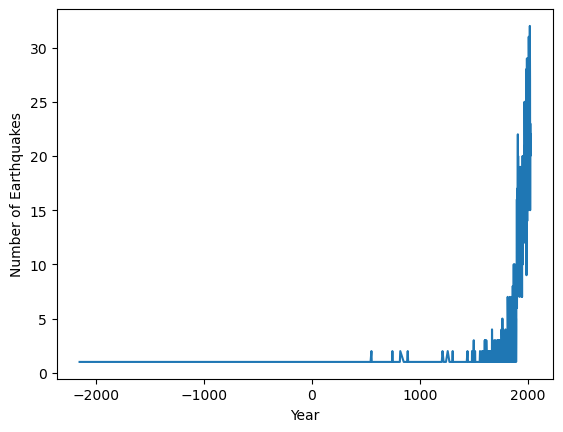

In [10]:
#1.2
Mag_data=Sig_Eqs[Sig_Eqs['Mag']>6.0]
Mag_data.groupby("Year")['Mag'].size().plot()
plt.xlabel("Year")
plt.ylabel("Number of Earthquakes")

In [21]:
#1.3
def CountEq_LargestEq(country):
    total_eqs=Sig_Eqs['Country'][Sig_Eqs['Country']==country].count()
    Mag_max=Sig_Eqs['Mag'][Sig_Eqs['Country']==country].max()
    date_largest=Sig_Eqs[['Year','Mo','Dy']][(Sig_Eqs['Mag']==Mag_max)&(Sig_Eqs['Country']==country)]
    return country,total_eqs, date_largest
CountEq_LargestEq('CHINA')
results = []
for country in Sig_Eqs['Country'].unique():
    results.append(CountEq_LargestEq(country))
result=pd.DataFrame(results,columns=['Country','Total Earthquakes','Date of Largest Earthquake'])
result=result.sort_values(by='Total Earthquakes', ascending=False)
print(result[['Country','Total Earthquakes','Date of Largest Earthquake']])

                      Country  Total Earthquakes  \
14                      CHINA                620   
33                      JAPAN                414   
68                  INDONESIA                411   
7                        IRAN                384   
9                      TURKEY                335   
..                        ...                ...   
93                     NORWAY                  1   
126  CENTRAL AFRICAN REPUBLIC                  1   
124                     PALAU                  1   
118                  KIRIBATI                  1   
156                       NaN                  0   

                            Date of Largest Earthquake  
14              Year   Mo    Dy
982  1668.0  7.0  25.0  
33             Year   Mo    Dy
5743  2011.0  3.0  11.0  
68           Year    Mo    Dy
5341  2004.0  12.0  26.0  
7              Year    Mo    Dy
238  856.0  12.0  22.0  
9            Year    Mo    Dy
3413  1939.0  12.0  2...  
..                               

C:\Users\a\AppData\Local\Temp\ipykernel_12596\2890954870.py:5: DtypeWarning: Columns (4,8,9,12,15,21,22,24,26,31,33,34) have mixed types. Specify dtype option on import or set low_memory=False.
  data_set=pd.read_csv('2281305.csv')


<Axes: xlabel='YEAR,MONTH'>

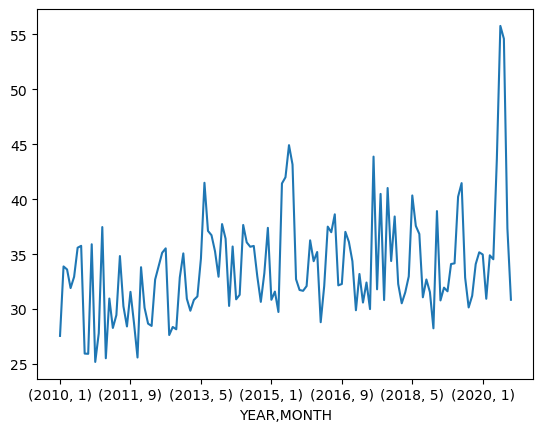

In [77]:
#2
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
data_set=pd.read_csv('2281305.csv')
wind_speed = data_set['WND'].str.split(',', expand=True)[3]
data_set['WS'] = pd.to_numeric(wind_speed, errors='coerce')
data_set['DATE'] = pd.to_datetime(data_set['DATE'])
data_set['YEAR'] = data_set['DATE'].dt.year
data_set['MONTH'] = data_set['DATE'].dt.month
data_new = data_set[data_set['WS'] != 9999]
data_new.groupby(['YEAR','MONTH'])['WS'].mean().plot()

In [27]:
#3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy import stats
#3.1
data=pd.read_csv('20fbf2f8-32b6-429a-9318-9b597daa80f8.csv')
df=pd.DataFrame(data)
for index,row in df.iterrows():
    df.loc[index]=row.dropna()
print(df)

        STATION  DATE  LATITUDE  LONGITUDE  ELEVATION  \
0   USC00218450  1961   44.9902  -93.17995      295.7   
1   USC00218450  1962   44.9902  -93.17995      295.7   
2   USC00218450  1963   44.9902  -93.17995      295.7   
3   USC00218450  1964   44.9902  -93.17995      295.7   
4   USC00218450  1965   44.9902  -93.17995      295.7   
..          ...   ...       ...        ...        ...   
57  USC00218450  2019   44.9902  -93.17995      295.7   
58  USC00218450  2020   44.9902  -93.17995      295.7   
59  USC00218450  2021   44.9902  -93.17995      295.7   
60  USC00218450  2022   44.9902  -93.17995      295.7   
61  USC00218450  2023   44.9902  -93.17995      295.7   

                                NAME   CDSD  CDSD_ATTRIBUTES   CLDD  \
0   UNIVERSITY OF MN ST. PAUL, MN US    NaN              NaN    NaN   
1   UNIVERSITY OF MN ST. PAUL, MN US    NaN              NaN    NaN   
2   UNIVERSITY OF MN ST. PAUL, MN US  395.5              NaN  395.5   
3   UNIVERSITY OF MN ST. PAUL, 

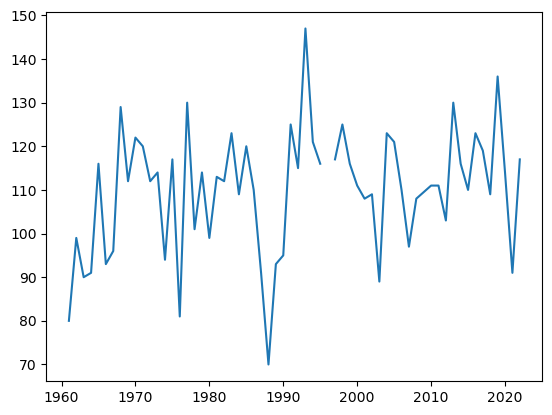

In [28]:
#3.2
plt.plot(df['DATE'],df['DP01'])
plt.show()

In [31]:
#3.3
variable_stats=df['CDSD'].describe()
print("CDSD的描述统计信息：")
print(variable_stats)
mean = df['CDSD'].mean()  
std_dev = df['CDSD'].std()  
min_value = df['CDSD'].min()  
max_value = df['CDSD'].max()  
range_of_values = max_value - min_value
print("Mean:", mean)  
print("Standard Deviation:", std_dev)  
print("Minimum Value:", min_value)  
print("Maximum Value:", max_value)  
print("Range of Values:", range_of_values)  

CDSD的描述统计信息：
count     59.000000
mean     406.818644
std       94.872596
min      200.600000
25%      343.150000
50%      397.200000
75%      466.300000
max      663.200000
Name: CDSD, dtype: float64
Mean: 406.8186440677965
Standard Deviation: 94.8725960116609
Minimum Value: 200.6
Maximum Value: 663.2
Range of Values: 462.6
